In [37]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

In [38]:
data = pd.read_csv('ds_salaries.csv')

data.head()


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [39]:
le = preprocessing.LabelEncoder()
data['experience_level'] = le.fit_transform(data['experience_level'])
data['employment_type'] = le.fit_transform(data['employment_type'])
data['salary_currency'] = le.fit_transform(data['salary_currency'])
data['job_title'] = le.fit_transform(data['job_title'])
data['employee_residence'] = le.fit_transform(data['employee_residence'])
data['company_location'] = le.fit_transform(data['company_location'])
data['company_size'] = le.fit_transform(data['company_size'])

data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,3,2,84,80000,7,85847,26,100,25,0
1,2023,2,0,66,30000,19,30000,75,100,70,2
2,2023,2,0,66,25500,19,25500,75,100,70,2
3,2023,3,2,47,175000,19,175000,11,100,12,1
4,2023,3,2,47,120000,19,120000,11,100,12,1


In [40]:
x = data[['work_year', 'experience_level', 'employment_type', 'company_size', 'employee_residence', 'company_location']]
y = data['salary_in_usd']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=12)


In [41]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

clf = MLPRegressor(
    hidden_layer_sizes=(10, 8),
    random_state=5,
    learning_rate_init=0.01,
    max_iter=1000,
)

clf.fit(X_train_scaled, y_train)

y_pred = clf.predict(X_test_scaled)

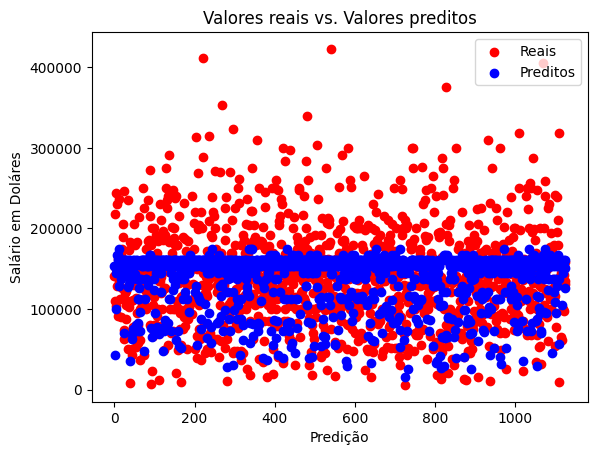

ValueError: Classification metrics can't handle a mix of multiclass and continuous targets

In [42]:
plt.scatter(range(len(y_test)), y_test, color='red', label='Reais')
plt.scatter(range(len(y_pred)), y_pred, color='blue', label='Preditos')
plt.xlabel('Predição')
plt.ylabel('Salário em Doláres')
plt.title('Valores reais vs. Valores preditos')
plt.legend()
plt.show()

print("R2 Score:", r2_score(y_test, y_pred))

In [ ]:
work_year = 2023
experience_level = int(input("Enter the experience level (0-4): "))
employment_type = int(input("Enter the employment type (0-2): "))
company_size = int(input("Enter the company size (0-3): "))
employee_residence = int(input("Enter the employee residence: "))
company_location = int(input("Enter the company location: "))

input_data = [[work_year, experience_level, employment_type, company_size, employee_residence, company_location]]
input_data_scaled = scaler.transform(input_data)

predicted_salary = clf.predict(input_data_scaled)

print("Predicted Salary (in USD):", float(predicted_salary[0]))

Predicted Salary (in USD): 136000.0


/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
